In [129]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import keras 

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D, Flatten,Dropout

In [130]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [131]:
x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2
)

In [132]:
epochs = 1000
batches = 100
shape = (28,28,1)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test,10)
y_validate = keras.utils.to_categorical(y_validate,10)
print(y_validate.shape)
print(y_test.shape)
x_train = x_train.reshape(48_000, 28, 28, 1)
x_test = x_test.reshape(10_000, 28, 28, 1)
x_validate = x_validate.reshape(12_000,28,28,1)

(12000, 10)
(10000, 10)


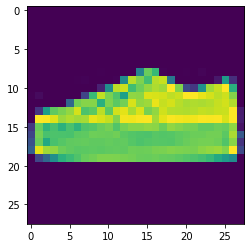

In [133]:
image = x_train[1, :].reshape((28, 28))

plt.imshow(image)
plt.show()

In [144]:
# our 3 models 


name = '1_Layer'
cnn_model_1 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1), name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout'),
    Flatten(name='flatten'),
    Dense(32, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)


name = '2_Layer'
cnn_model_2 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1), name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool_2'),
    
    Conv2D(64, kernel_size=3, activation='relu',name='Conv2D-2'),
    MaxPooling2D(pool_size=2, name='MaxPool_3'),
    Conv2D(128, kernel_size=3, activation='relu',name='Conv2D-3'),
    Dropout(0.2, name='Dropout'),
    
    Flatten(name='flatten'),
    Dense(1024, activation='relu', name='Dense'),
    Dropout(0.2, name='Dropout_2'),
    Dense(10, activation='softmax', name='Output')
], name=name)

cnn_models = [cnn_model_1, cnn_model_2]


In [145]:
for model in cnn_models:
    model.summary()

Model: "1_Layer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 13, 13, 32)        0         
_________________________________________________________________
Dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
Dense (Dense)                (None, 32)                173088    
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_____________________________________________________

In [146]:
# train the models and save results to a dict
batch_size = 100

for model in cnn_models:
    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.Adam(),
        metrics=['accuracy']
    )
    
    model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=50, validation_data = (x_validate, y_validate)
    )

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 9s 194us/step - loss: 8.7917 - acc: 0.4490 - val_loss: 8.3609 - val_acc: 0.4776
Epoch 2/50
48000/48000 [==============================] - 6s 125us/step - loss: 2.9074 - acc: 0.7025 - val_loss: 0.3950 - val_acc: 0.8586
Epoch 3/50
48000/48000 [==============================] - 6s 125us/step - loss: 0.3593 - acc: 0.8712 - val_loss: 0.3313 - val_acc: 0.8840
Epoch 4/50
48000/48000 [==============================] - 6s 125us/step - loss: 0.3033 - acc: 0.8889 - val_loss: 0.3260 - val_acc: 0.8831
Epoch 5/50
48000/48000 [==============================] - 6s 125us/step - loss: 0.2756 - acc: 0.8983 - val_loss: 0.3089 - val_acc: 0.8937
Epoch 6/50
48000/48000 [==============================] - 6s 125us/step - loss: 0.2558 - acc: 0.9043 - val_loss: 0.3119 - val_acc: 0.8913
Epoch 7/50
48000/48000 [==============================] - 6s 125us/step - loss: 0.2430 - acc: 0.9087 - val_loss: 0.3252 - 

48000/48000 [==============================] - 8s 175us/step - loss: 14.5016 - acc: 0.1003 - val_loss: 14.5251 - val_acc: 0.0988
Epoch 10/50
48000/48000 [==============================] - 8s 174us/step - loss: 14.5016 - acc: 0.1003 - val_loss: 14.5251 - val_acc: 0.0988
Epoch 11/50
48000/48000 [==============================] - 8s 174us/step - loss: 14.5016 - acc: 0.1003 - val_loss: 14.5251 - val_acc: 0.0988
Epoch 12/50
48000/48000 [==============================] - 8s 175us/step - loss: 14.5016 - acc: 0.1003 - val_loss: 14.5251 - val_acc: 0.0988
Epoch 13/50
48000/48000 [==============================] - 8s 174us/step - loss: 14.5016 - acc: 0.1003 - val_loss: 14.5251 - val_acc: 0.0988
Epoch 14/50
48000/48000 [==============================] - 8s 174us/step - loss: 14.5016 - acc: 0.1003 - val_loss: 14.5251 - val_acc: 0.0988
Epoch 15/50
48000/48000 [==============================] - 8s 174us/step - loss: 14.5016 - acc: 0.1003 - val_loss: 14.5251 - val_acc: 0.0988
Epoch 16/50
48000/48000 [

In [147]:
loss = []
for model in cnn_models:
    loss.append(model.evaluate(x=x_test, y=y_test))

10000/10000 [==============================] - 1s 143us/step


In [148]:
for (v,s) in loss:
    print(v)
    print(s)

0.5104970268949867
0.8931
14.506285662841798
0.1
